In [1]:
# Print your Emory ID here
print("Emory ID: 12345678")

Emory ID: 12345678


In [4]:
# Import the necessary libraries and load the data
import pandas as pd

1. An online password attack is when someone tries to hack your account by simply trying a very large number of username/password combinations to access your account. For each `password` in our dataset, the `value` column shows the amount of time it is estimated to take an “online password attack” to hack your account. The column `time_unit` shows the units of that time value (e.g., hours, days, years, etc.). It would be much nicer if our values were of the same units so we can more easily compare the “online password guessing time” for each password. So your first task is to convert all of the values to units of hours (assume the conversion units provided below, e.g., 1 day is 24 hours, 1 week is 168 hours, etc).

In [12]:
# Your answer here 
data = pd.read_csv("passwords.csv")
units = {
    "seconds": 1 / 3600,
    "minutes": 1 / 60,
    "hours": 1,
    "days": 24,
    "weeks": 168,
    "months": 720,
    "years": 8760,
}

data["time"] = data.apply(
    lambda row: row["value"] * units.get(row["time_unit"], None) if pd.notnull(row["value"]) and pd.notnull(row["time_unit"]) else None,
    axis=1
)
data.head()

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size,time
0,1.0,password,password-related,6.91,years,2.170000e+00,1.0,8.0,11.0,60531.600000
1,2.0,123456,simple-alphanumeric,18.52,minutes,1.110000e-05,2.0,4.0,8.0,0.308667
2,3.0,12345678,simple-alphanumeric,1.29,days,1.110000e-03,3.0,4.0,8.0,30.960000
3,4.0,1234,simple-alphanumeric,11.11,seconds,1.110000e-07,4.0,4.0,8.0,0.003086
4,5.0,qwerty,simple-alphanumeric,3.72,days,3.210000e-03,5.0,8.0,11.0,89.280000


2. Are there any missing values in the dataset? If so, how many? After you have counted the, please drop them from the dataset.

In [14]:
# Your answer here
count = data.isna().sum()
print(f"Missing values in each column: {count}")
data = data.dropna()

Missing values in each column: rank                 7
password             7
category             7
value                7
time_unit            7
offline_crack_sec    7
rank_alt             7
strength             7
font_size            7
time                 7
dtype: int64


3. Which password category has the highest average strength?


In [15]:
# Your answer here
strength_by_category = data.groupby("category")["strength"].mean()

strongest_category = strength_by_category.idxmax()
highest_strength = strength_by_category.max()

print(f"The password category with the highest strength is '{strongest_category}' with a strength of {highest_strength}.")


The password category with the highest strength is 'nerdy-pop' with a strength of 14.0.


4. What is the rank of the password 'qwerty'?

In [17]:
# Your answer here
rank = data[data["password"] == "qwerty"]["rank"].values[0]
print(f"The rank of the password 'qwerty' is {rank}.")

The rank of the password 'qwerty' is 5.0.


5. How many passwords have more than 8 characters?

In [43]:
# Your answer here
count = data[data["password"].str.len() > 8].shape[0]
print(f"The number of passwords with length greater than 8 is {count}.")

The number of passwords with length greater than 8 is 1.


6. How many passwords do not contain a number?

In [29]:
# Your answer here
no_number_count = data[~data["password"].str.contains(r'\d', na=False)].shape[0]
print(f"The number of passwords without numbers is {no_number_count}.")

The number of passwords without numbers is 446.


7. What is the average time in hours needed to crack these passwords that begin with `123`? How does this compare to the average of all passwords in the dataset?

In [32]:
# Your answer here
subset = data[data["password"].str.startswith("123")]
subset_average = subset["time"].mean()
set_average = data["time"].mean()
print(f"The average time for passwords starting with '123' is {subset_average} hours, while the average time for all passwords is {set_average} hours.")

The average time for passwords starting with '123' is 107.30332438271606 hours, while the average time for all passwords is 13917.565247227776 hours.


8. What percentage of passwords are of the `simple-alphanumeric` category?

In [33]:
# Your answer here
subset_count = data[data["category"] == "simple-alphanumeric"].shape[0]
total_count = data.shape[0]
print(f"The proportion of passwords in the 'simple-alphanumeric' category is {subset_count / total_count}.")

The proportion of passwords in the 'simple-alphanumeric' category is 0.122.


9. How many passwords have a strength rating below 5? What is their percentage?

In [35]:
# Your answer here
subset_count = data[data["strength"] < 5].shape[0]
total_count = data.shape[0]
print(f"There are {subset_count} passwords with strength less than 5.")
print(f"The proportion is {subset_count / total_count}.")

There are 73 passwords with strength less than 5.
The proportion of passwords with strength less than 5 is 0.146.


10. What is the most common password in the dataset?

In [36]:
# Your answer here
most_common = data["password"].value_counts().idxmax()
print(f"The most common password is '{most_common}'.")

The most common password is 'password'.


11. How many unique passwords are there in each category, and what is their average length?

In [39]:
# Your answer here
unique = data.groupby("category")["password"].nunique()
average_length = data.groupby("category")["password"].apply(lambda x: x.str.len().mean())
print(f"Unique passwords in each category: {unique}")
print(f"Average length of passwords in each category: {average_length}")

Unique passwords in each category: category
animal                  29
cool-macho              79
fluffy                  44
food                    11
name                   183
nerdy-pop               30
password-related        15
rebellious-rude         11
simple-alphanumeric     61
sport                   37
Name: password, dtype: int64
Average length of passwords in each category: category
animal                 6.206897
cool-macho             6.253165
fluffy                 5.795455
food                   6.090909
name                   6.218579
nerdy-pop              6.633333
password-related       6.333333
rebellious-rude        6.363636
simple-alphanumeric    5.934426
sport                  6.513514
Name: password, dtype: float64


12. What is the median rank and strength for passwords of each length?

In [44]:
# Your answer here
# 12. What is the median rank and strength for passwords of each length?
data["length"] = data["password"].str.len()
median_rank = data.groupby("length")["rank"].median()
median_strength = data.groupby("length")["strength"].median()
print(f"Median rank for passwords of each length: {median_rank}")
print(f"Median strength for passwords of each length: {median_strength}")

Median rank for passwords of each length: length
4    326.0
5    343.0
6    231.0
7    222.0
8    286.0
9     49.0
Name: rank, dtype: float64
Median strength for passwords of each length: length
4    6.0
5    7.0
6    7.0
7    8.0
8    8.0
9    4.0
Name: strength, dtype: float64


13. Add a column `strength_label` with values `weak` if strength is below 5, else `strong`. Use a lambda function.

In [45]:
# Your answer here
data["strength_label"] = data["strength"].apply(lambda x: "weak" if x < 5 else "strong")

14. Create a column `high_value` with a value of `True` if value is in the top 10% of values in the dataset.

In [49]:
# Your answer here
data["high_value"] = data["value"] > data["value"].quantile(0.9)

15. Join all passwords within each `category` into a single string.

In [51]:
# Your answer here
joined = data.groupby("category")["password"].apply(lambda x: " ".join(x))
print(joined)

category
animal                 dragon monkey bigdog falcon phoenix tigers chi...
cool-macho             mustang shadow master harley hunter ranger bus...
fluffy                 love sunshine silver orange ginger summer prin...
food                   pepper cheese coffee banana butter muffin hotd...
name                   michael jennifer jordan superman thomas tigger...
nerdy-pop              starwars computer merlin matrix snoopy boomer ...
password-related       password letmein test pass access gateway plea...
rebellious-rude        biteme freedom secret whatever badboy sexsex b...
simple-alphanumeric    123456 12345678 1234 qwerty 12345 696969 abc12...
sport                  baseball football soccer hockey dallas yankees...
Name: password, dtype: object


**Bonus question 01**: What is the correlation between password length and strength? Create a scatter plot with regression line.

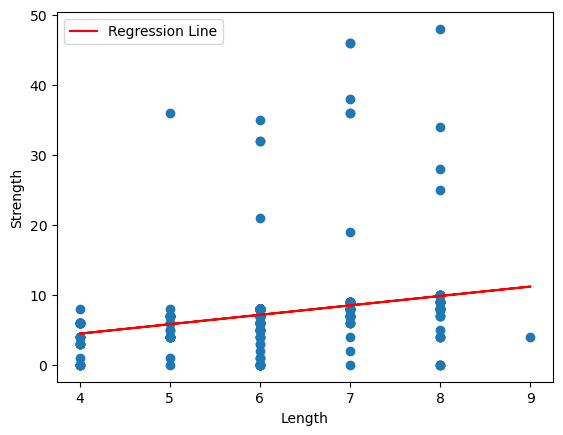

In [56]:
# Your answer here
import matplotlib.pyplot as plt
from scipy.stats import linregress

plt.scatter(data["length"], data["strength"])
slope, intercept, _, _, _ = linregress(data["length"], data["strength"])
regression_line = slope * data["length"] + intercept
plt.plot(data["length"], regression_line, color="red", label="Regression Line")

plt.xlabel("Length")
plt.ylabel("Strength")
plt.legend()
plt.show()

**Bonus question 02**: Find all passwords with palindromes.

In [62]:
# Your answer here
def palindromes(password):
    return password == password[::-1]

data["palindrome"] = data["password"].apply(palindromes)
palindrome_count = data["palindrome"].sum()
print(f"The palindromic passwords are {data[data['palindrome']]['password']}.")
print(f"The number of palindromic passwords is {palindrome_count}.")

The palindromic passwords are 18       111111
59       666666
76         1111
105      aaaaaa
144      xxxxxx
190      hannah
192    11111111
206     7777777
277      222222
285    xxxxxxxx
286      777777
291    88888888
314        2112
324        7777
352      zzzzzz
364      555555
371        2222
373        4444
409       11111
413      123321
420      999999
458      333333
472        xxxx
489      888888
Name: password, dtype: object.
The number of palindromic passwords is 24.
